In [1]:
import sys
import yaml

import matplotlib.pylab as plt
import torch
import transformers
from transformers import AutoTokenizer, AutoModel

sys.path.append("..")

from model.generator import GeneratorNet
from utils import load_checkpoint

transformers.logging.set_verbosity_error()
%matplotlib inline

In [2]:
with open("../config.yaml") as f:
    configs = yaml.safe_load(f)


model = GeneratorNet(
    configs["model"]["text_dim"],
    configs["model"]["embedding_dim"],
    configs["model"]["noise_dim"],
    configs["model"]["gen_channels"],
    configs["image"]["resolution"],
)
load_checkpoint("../check_points/50/generator.ckpt", model)

In [3]:
pretrain_model = "albert-base-v2"
tokenizer = AutoTokenizer.from_pretrained(pretrain_model)
langage_model = AutoModel.from_pretrained(pretrain_model)


sentence = "Ghost In The Shell"
words = tokenizer(sentence.split(), padding=True, return_tensors="pt")
words = langage_model(**words).last_hidden_state
words = torch.mean(words, axis=[0, 1]).expand(configs["training"]["batch_size"], -1)

noise = torch.zeros(configs["training"]["batch_size"], configs["model"]["noise_dim"])

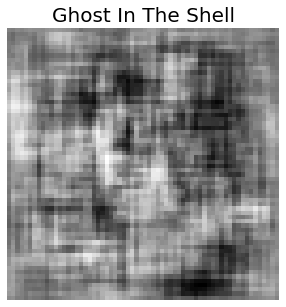

In [10]:
model.eval()
with torch.no_grad():
    fake_images, _, _ = model(words, noise)


fig, ax = plt.subplots(1, 1, figsize = (5, 5))
ax.imshow(fake_images[-1][0].numpy().squeeze(), cmap="gray")
ax.axis("off")
ax.set_title(sentence, fontsize=20)
plt.show()